In [264]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import time
import joblib
import os
import csv
from time import time_ns
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
scala=1

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import tensorflow as tf

In [265]:
# standard_scaler = joblib.load('standard_scaler.pickle')
# min_max_scaler = joblib.load('min_max_scaler.pickle')
used_scaler = 'standard'
scala = 1

In [266]:
def readTxtToData(data):
    
    columns = ['throughput','durasi','ntp_time','data_collection_count','block_sequence_length','num_devices','lower_outlier','mac']

    row = {
        columns[0]: [],
        columns[1]: [],
        columns[2]: [],
        columns[3]: [],
        columns[4]: [],
        columns[5]: [],
        columns[6]: [],
        columns[7]: []
    }
    
    #READ FILE A FILE
    a_file = open(data, "r")
    lines = a_file.readlines()
    last_xlines = lines[-(9999):]
    a_file.close()
    #CLOSE FILE
    baris = 0
    for data in last_xlines:
        split = data.split(";")
        row['mac'].append("08:3A:F2:A9:8D:85")
        start = float(split[1]) + (float(split[2])/1000000)
        row['ntp_time'].append(str(start))
        baris = baris + 1
        row['data_collection_count'].append(baris)
        row['block_sequence_length'].append(1)
        end = float(split[3]) + (float(split[4])/1000000)
        row['throughput'].append(round(float(split[0])/(end-start))/scala )
        row['num_devices'].append(1)
        row['lower_outlier'].append(False)
        row['durasi'].append(end-start)
     
    df = pd.DataFrame(row, columns=columns)
    print(df)
    with open("dataSheetRosa-v3.csv", 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["ntp_time","throughput","durasi"])
        for index, row in df.iterrows():
            
            writer.writerow([row['ntp_time'], row['throughput'], row['durasi']])
    return df

In [267]:

train_data = readTxtToData("../cnn/perdetikesp3.txt")
test_data = readTxtToData("../cnn/perdetikesp3 test.txt")
train_data.head()
input_file = 'perdetikesp3 test.txt'

      throughput  durasi           ntp_time  data_collection_count  \
0        31305.0     1.0  1669710690.519096                      1   
1        31305.0     1.0  1669710691.519096                      2   
2        31305.0     1.0  1669710692.519096                      3   
3        31305.0     1.0  1669710693.519096                      4   
4        13360.0     1.0  1669710694.519096                      5   
5            0.0     1.0  1669710695.519096                      6   
6            0.0     1.0  1669710696.519096                      7   
7            0.0     1.0  1669710697.519096                      8   
8            0.0     1.0  1669710698.519096                      9   
9            0.0     1.0  1669710699.519096                     10   
10     1191751.0     1.0  1669710700.519096                     11   
11       11436.0     1.0  1669710701.519096                     12   
12           0.0     1.0  1669710702.519096                     13   
13           0.0    

In [268]:
def make_time_step_dataset(data, time_steps, num_output):
    x, y = [], []
    for i in range(len(data) - time_steps - num_output + 1):
        temp = data[i:(i+time_steps), 0]
        x.append(temp)
        temp = data[(i + time_steps):(i+time_steps+num_output), 0]
        y.append(temp)
    return np.array(x), np.array(y)
naive_mean_list = np.genfromtxt(os.path.join('regression/naive_mean_list.csv'), delimiter=',')
naive_mean_list_rmse = np.genfromtxt(os.path.join('regression/naive_mean_list_rmse.csv'), delimiter=',')
def naive_mean(seq_len, device):
    output = naive_mean_list[device.astype(int)-1][seq_len.astype(int)-1]
    rmse = naive_mean_list_rmse[device.astype(int)-1]
    return output, rmse

def regression(params, function):
    output = np.array([naive_mean(reg[0], reg[1]) for reg in params])
    return output

In [269]:
# aa = train_data["throughput"]
# bb = np.array(aa)
# cc= bb.reshape(-1,1)
# print(cc)
# print(standard_scaler.fit(cc))
# print(standard_scaler.mean_)
# joblib.dump(standard_scaler,"standard.pickle")
# transform = standard_scaler.transform(cc)
# for i in range(0,len(cc)):  
#     train_data.loc[i,"throughput"]= transform[i][0]
# print(train_data)

# aa = test_data["throughput"]
# bb = np.array(aa)
# cc= bb.reshape(-1,1)
# print(standard_scaler.fit(cc))
# print(standard_scaler.mean_)
# transform = standard_scaler.transform(cc)
# for i in range(0,len(cc)):  
#     test_data.loc[i,"throughput"]= transform[i][0]
# print(test_data)

In [270]:
# X = np.array(train_data.drop("throughput", axis=1)).astype('float32')
# y = np.array(train_data['throughput']).astype('float32')
# for i in range(9):
#     plt.subplot(3,3,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
#     plt.xlabel(y[i])
# plt.show()

# X = X / 255.0
# X = X.reshape(-1, 28, 28, 1)
# y = to_categorical(y)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# X_test = np.array(test_data).astype('float32')
# X_test = X_test / 255.0
# X_test = X_test.reshape(-1, 28, 28, 1)
# plt.figure(figsize=(10,10))

In [271]:
# model = Sequential()
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation = "softmax"))
# model.summary()
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model1.png')

In [272]:
def prepare_dataset(data, num_output, time_steps):
    total_x = np.empty((0, time_steps))
    total_x1 = np.empty((0, time_steps))
    total_x2 = np.empty((0, 2))
    total_y = np.empty((0, num_output))
    total_y1 = np.empty((0, num_output))

    for mac in data['mac'].unique():
        select = data.loc[data['mac'] == mac]
        for seq_len in select['block_sequence_length'].unique():
            select2 = select.loc[select['block_sequence_length'] == seq_len]
            for num_devices in select2['num_devices'].unique():
                select3 = select2.loc[select2['num_devices'] == num_devices]
                select3 = select3[['throughput']]
                select3 = select3.to_numpy()

                x, y = make_time_step_dataset(select3, time_steps, num_output)
                total_x = np.append(total_x, x, axis=0)
                total_y = np.append(total_y, y, axis=0)

                select4 = select2.loc[select2['num_devices'] == num_devices]
                select4 = select4[['lower_outlier']]
                select4 = select4.to_numpy()
                x1, y1 = make_time_step_dataset(select4, time_steps, num_output)
                total_x1 = np.append(total_x1, x1, axis=0)
                total_y1 = np.append(total_y1, y1, axis=0)

                x2 = np.zeros(shape=(len(x), 2))
                x2[:, 0] = seq_len
                x2[:, 1] = num_devices
                total_x2 = np.append(total_x2, x2, axis=0)

    total_x = total_x.reshape(-1, time_steps, 1)
    total_x1 = total_x1.reshape(-1, time_steps, 1)
    print(total_x)
    return total_x, total_x1, total_x2, total_y, total_y1
train_x0, train_x1, train_x2, train_y, train_y1 = prepare_dataset(
        train_data, 5, 10)
test_x0, test_x1, test_x2, test_y, test_y1 = prepare_dataset(
        test_data, 5, 10)
# train_x0 = prepare_dataset(train_data, 5, 10)
# print(train_x0)
# train_x1 = prepare_dataset(train_data, 5, 10)
# train_x2 = prepare_dataset(train_data, 5, 10)
# train_y= prepare_dataset(train_data, 5, 10)
# train_y1 = prepare_dataset(train_data, 5, 10)
# X_train, X1_train= prepare_dataset(train_data, 5, 10)
# y_train = prepare_dataset(train_data, 5, 10)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# x_val = X_train[-10000:]
# y_val = y_train[-10000:]
# train_X = tf.expand_dims(X_train, axis=-1)
# test_X = tf.expand_dims(X_test, axis=-1)

[[[  31305.]
  [  31305.]
  [  31305.]
  ...
  [      0.]
  [      0.]
  [      0.]]

 [[  31305.]
  [  31305.]
  [  31305.]
  ...
  [      0.]
  [      0.]
  [1191751.]]

 [[  31305.]
  [  31305.]
  [  13360.]
  ...
  [      0.]
  [1191751.]
  [  11436.]]

 ...

 [[      0.]
  [      0.]
  [      0.]
  ...
  [      0.]
  [      0.]
  [      0.]]

 [[      0.]
  [      0.]
  [      0.]
  ...
  [      0.]
  [      0.]
  [      0.]]

 [[      0.]
  [      0.]
  [      0.]
  ...
  [      0.]
  [      0.]
  [      0.]]]
[[[32618.]
  [32618.]
  [30846.]
  ...
  [    0.]
  [90198.]
  [17116.]]

 [[32618.]
  [30846.]
  [84555.]
  ...
  [90198.]
  [17116.]
  [    0.]]

 [[30846.]
  [84555.]
  [32735.]
  ...
  [17116.]
  [    0.]
  [    0.]]

 ...

 [[29260.]
  [30343.]
  [31406.]
  ...
  [32287.]
  [32287.]
  [32287.]]

 [[30343.]
  [31406.]
  [13849.]
  ...
  [32287.]
  [32287.]
  [42880.]]

 [[31406.]
  [13849.]
  [    0.]
  ...
  [32287.]
  [42880.]
  [32180.]]]


In [273]:
n_timesteps, n_features, n_outputs = train_x0.shape[1], train_x1.shape[2], train_y.shape[1]
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(n_outputs))
model.compile(loss='mse', optimizer='adam')
print (model)

Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 1739954176.0000 - accuracy: 0.3111
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 1642982400.0000 - accuracy: 0.3221
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 1635832832.0000 - accuracy: 0.3146
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 1631604864.0000 - accuracy: 0.2802
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 1628755584.0000 - accuracy: 0.3081
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 1626728960.0000 - accuracy: 0.2950
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 1627087360.0000 - accuracy: 0.2566
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 1625006976.0000 - accuracy: 0.2817
Epoch 9/10
125/125 [==============================] - 0s 2ms/step - loss: 1626387072.0000 - accuracy: 0.2998
Epoch 10/10
125/125

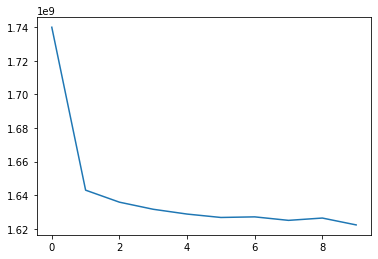

In [274]:
#increse to epochs to 30 for better accuracy
model.compile(optimizer='adam', loss="mse", metrics=["accuracy"])
# history = model.fit(X_train, y_train, epochs=10, batch_size=85, validation_data=(X_val, y_val))
# history = model.fit(X_train, y_train, batch_size=85,epochs=10, validation_split=0.2)
# train_x2 = regression(train_x2, "naive_mean")
# train_x0 = np.concatenate([train_x0, train_x1], axis=2)
# history = model.fit([train_x0, train_x1], train_y,
#                                 batch_size=85, epochs=10, validation_split=0.2)
# history = model.fit(train_x0, train_y, batch_size=85,
#                                 epochs=10, validation_split=0.2)
verbose, epochs, batch_size = 1, 10, 32
history=model.fit(train_x0, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
model.save_weights('model/model_1.h5')
print('model and weights written to disk')
hist_list = pd.DataFrame()
hist_list.loc[:, 'loss'] = history.history['loss']
# hist_list.loc[:, 'val_loss'] = history.history['val_loss']
# plt.plot(hist_list[['loss', 'val_loss']])    
plt.plot(hist_list['loss'])
    
# plt.savefig(f'model_vanilla/{i}_hist.png')

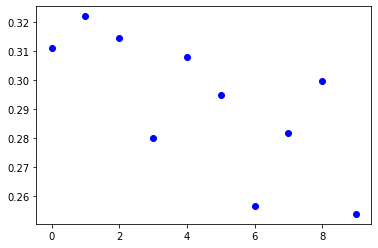

In [275]:
accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.show()

# print(model.evaluate(X_val, y_val))

In [276]:
# prediction = model.predict_classes(test_x0)
# submit = pd.DataFrame(prediction,columns=["Prediction"])
# submit["Time"] = pd.Series(range(1,(len(prediction)+1)))
# submission = submit[["Time","Prediction"]]
# submission.to_csv("submission.csv",index=False)

In [277]:
import pickle
def save_to_pickle(data, dir, fname):
    with open(os.path.join(dir, fname), 'wb') as f:
        pickle.dump(data, f)
    print('{} written to pkl'.format(fname))
def load_from_pickle(dir, fname):
    with open(os.path.join(dir,fname), 'rb') as f:
        data = pickle.load(f)
    return data

def walk_forward_validation(data, model, n_input):
    ''' walk-forward validation
        advances one unit at a time for a fixed set (e.g. daily, by week)
        inputs
            data        np array    must be shape that model has been trained on
            model       keras model with .predict() method and verbose parameter
            n_input     int         number of units to include in each input set
        outputs
            true        list        true values
            pred        list        predicted values, same length as true
        caveats
            data must match shape that model was trained on
            model must be trained on same n_input

    '''
    true = []
    pred = []
    c = 0
    for i in range(len(data) - (2*n_input)):
        input = data[c:c + n_input]
        input = input.reshape(1, len(input), 1)
        y_true = data[c + n_input: c + 2*n_input]
        y_hat = model.predict(input, verbose=1)
        true.append(y_true)
        pred.append(y_hat.squeeze()) # drop one dimension
        print(c)
        c += 1

    return true, pred

def calc_rmse_error(true, pred):
    ''' calc mse error from lists of true and predicted values
        uses sklearn.metrics.mean_squared_error()
        input lists can contain ints or arrays'''
    errors = []
    for y_true, y_hat in zip(true, pred):
        mse = mean_squared_error(y_true, y_hat)
        rmse = np.sqrt(mse)
        errors.append(rmse)
    return np.array(errors)
import keras
def loadModel():
    config = joblib.load(os.path.join(f'model_dump.pickle'), mmap_mode='r')
    model = keras.Sequential().from_config(config)
    model.load_weights('model/model_1.h5')
    print('model and weights loaded')
    return model
# load model weights
# model.load_weights('model/model_1.h5')
# joblib.dump(model.get_config(), f'model_dump.pickle')
# print('model and weights loaded')

# load data: train set in inputs/outputs, test set
# X_train = load_from_pickle('X_train.pickle')
# y_train = load_from_pickle('y_train.pickle')
# test_df = load_from_pickle(f'data_test.pickle')
# test = test_df.values

    # evaluate on test set: univariate
# feat_col = 0
# test = test[:,feat_col]
# true, pred = walk_forward_validation(test, model, n_input=7)

    # score predictions, save to file
# errors = calc_rmse_error(true, pred)
# save_to_pickle((true, pred, errors), 'output', 'output_1.pickle')

In [278]:
def generate_data_from_dataset(a):
    data_test = readTxtToData(a)
    #print(data_test[0:100])
    #Pre-process data
    columns2 = ['ntp_time','throughput']
    row2 = {
        columns2[0]: [],
        columns2[1]: []   
    }
    start_time = float(data_test.iloc[0]["ntp_time"])
    tp_per_x_sec = 1
    end_time = start_time + tp_per_x_sec
    buffer_durasi = 0
    buffer_th = 0
    for index, row in data_test.iterrows():
        th = row['throughput']
        start = float(row['ntp_time'])
        durasi = row['durasi']

        while start >= end_time:
            tp_updated = (buffer_durasi * buffer_th)
            row2['ntp_time'].append(str(end_time - tp_per_x_sec))
            row2['throughput'].append(tp_updated/tp_per_x_sec)
            buffer_durasi = 0
            end_time = end_time + tp_per_x_sec
            buffer_th = th
        
        if (start + durasi >= end_time): #rekaputulasi data
            
            if (durasi >= tp_per_x_sec):
                buffer_durasi_local = buffer_durasi + durasi
                durasi_round_down = np.floor(buffer_durasi_local)

                for i in range(int(durasi_round_down)):
                    print(i)
                    if (i == 0):
                        tp_updated = (buffer_durasi * buffer_th) + ((1-buffer_durasi)*th)
                        
                        row2['ntp_time'].append(str(end_time - tp_per_x_sec))
                        row2['throughput'].append(tp_updated/tp_per_x_sec)
                        end_time = end_time + tp_per_x_sec
                    else :
                        
                        row2['ntp_time'].append(str(end_time - tp_per_x_sec))
                        row2['throughput'].append(th/tp_per_x_sec)
                        end_time = end_time + tp_per_x_sec
                buffer_durasi = buffer_durasi_local - durasi_round_down 
                buffer_th = th    
                
            else:
                total_durasi = buffer_durasi + durasi
                excess = total_durasi - tp_per_x_sec
                if (excess < 0):
                    th_updated = (buffer_durasi * buffer_th) + ((durasi) * th) 
                    row2['ntp_time'].append(str(end_time - tp_per_x_sec))
                    row2['throughput'].append(th_updated/tp_per_x_sec)
                    end_time = end_time + tp_per_x_sec
                    buffer_durasi = 0
                    buffer_th = 0
                else:
                    th_updated = (buffer_durasi * buffer_th) + ((durasi - excess) * th)    
                    row2['ntp_time'].append(str(end_time - tp_per_x_sec))
                    row2['throughput'].append(th_updated/tp_per_x_sec)
                    end_time = end_time + tp_per_x_sec
                    buffer_durasi = excess
                    buffer_th = th     
    
        else : 
                 
            buffer_th = (buffer_durasi * buffer_th) + (durasi * th)       
            buffer_durasi = buffer_durasi +durasi
            buffer_th = buffer_th / buffer_durasi

            
    preprocessData = pd.DataFrame(row2, columns=columns2)

    return preprocessData

In [279]:
input_len = 10 #30 detik kebelakang
output_len = 5 #5 detik kedepan
output_file = 'output-cnn-Rosa.csv'
import time
def Average(lst):
    # print ((lst) / len(lst))
    return np.sum(lst) / len(lst)
def process_CNN_Prediction(data,model):
    
    output_data=[]
    global_time = []
    for index, row in data.iterrows():
        input_data =[]
        if ((index+1) % output_len == 0):
            if (index < input_len-1):
                sample_data = data.iloc[0:index+1]['throughput']             
                time = row['ntp_time']            
                input_data.append(sample_data)            
                total_x = np.array(input_data)           
                total_x =np.concatenate([total_x[0], np.zeros(input_len-index-1)])
               
                #sample_data = sample_data.values.tolist()
                #listofzeros = [[0.0]] * (input_len-index-1)          
                #input_data = [*sample_data, *listofzeros]       
                total_x_valid = []
                total_x_valid.append(total_x)   
                total_x_valid = np.array(total_x_valid)                    
                pred_y = model.predict(total_x_valid)
                #print(pred_y)
                pred_y = pred_y[0]
                output_data.append([time,Average(pred_y)*scala]) 
                                
                # fc = standard_scaler.inverse_transform([pred_y])    
                # print(fc)
                # fc = fc[0]
                # print(fc)
                # print(Average(fc)*scala)
                # output_data.append([time,Average(fc)*scala])               
              
            else :
                sample_data = data.iloc[index-(input_len-1):index+1]['throughput']
                #print(sample_data)
                time = row['ntp_time']
                input_data.append(sample_data)
                total_x = np.array(input_data)
                #print(total_x)
                # start_time_exe = t()
                print(total_x)
                pred_y = model.predict(total_x)
                pred_y = pred_y[0]
                print(pred_y)
                
                output_data.append([time,Average(pred_y)*scala]) 
                # fc = standard_scaler.inverse_transform([pred_y])    
                # fc = fc[0]
                # print(Average(fc))
                # output_data.append([time,Average(fc)*scala])

                # end_time_exe = t()
                # global_time.append(end_time_exe - start_time_exe)
                # print(end_time_exe-start_time_exe) 
    #print(output_data)
    # ave = Average(global_time)
    # print("TIME : " + str(ave))
    with open(output_file, 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["time","prediction"])
        for data in output_data:        
            writer.writerow([data[0],data[1]])


model = loadModel()
data = generate_data_from_dataset(input_file)
print(data)

# aa = data["throughput"]
# bb = np.array(aa)
# cc= bb.reshape(-1,1)
# standard_scaler.fit(cc)
# print(standard_scaler.mean_)
# transform = standard_scaler.transform(cc)
# for i in range(0,len(cc)):  
#     data.loc[i,"throughput"]= transform[i][0]
print(data)

process_CNN_Prediction(data,model)


model and weights loaded
     throughput  durasi           ntp_time  data_collection_count  \
0       32618.0     1.0  1669714690.519096                      1   
1       32618.0     1.0  1669714691.519096                      2   
2       30846.0     1.0  1669714692.519096                      3   
3       84555.0     1.0  1669714693.519096                      4   
4       32735.0     1.0  1669714694.519096                      5   
5        5798.0     1.0  1669714695.519096                      6   
6           0.0     1.0  1669714696.519096                      7   
7           0.0     1.0  1669714697.519096                      8   
8       90198.0     1.0  1669714698.519096                      9   
9       17116.0     1.0  1669714699.519096                     10   
10          0.0     1.0  1669714700.519096                     11   
11          0.0     1.0  1669714701.519096                     12   
12          0.0     1.0  1669714702.519096                     13   
13       

In [280]:
# def timeseries_from_staggered_timeseries_sets(data, n):
#     ''' for staggered timeseries where sets are equal length, advancing by one unit '''
#     # indices that contain independent sets of values
#     ii = np.linspace(n, len(data), int(len(data)/ 7))
#     ii = np.insert(ii, 0, 0)
#     ii = np.delete(ii, -1)
#     ii = ii.astype(int)

#     yy = []
#     for i in ii:
#         yy.append(list(data[i])) # append lists
#         flat = [item for sublist in yy for item in sublist]
#     return flat

# if __name__=='__main__':
#     # load output and test set
#     (true, pred, errors) = load_from_pickle('output', 'output_1.pickle')
#     test_df = load_from_pickle('data', 'data_test.pickle')
#     test = test_df.values

#     # get single timseries for true and pred (pred is first day predition)
#     n_days = 7
#     yy_true = timeseries_from_staggered_timeseries_sets(true, n_days)
#     yy_pred = timeseries_from_staggered_timeseries_sets(pred, n_days)
#     print (yy_true)
#     print(yy_pred) 

#     # plot true vs predicted
#     fname = 'output_1_predictions'
#     plt.plot(yy_true, 'b', label='true')
#     plt.plot(yy_pred, 'orange', label='predicted', linewidth=2)
#     plt.ylabel('power usage [kW]')
#     plt.xlabel('test period [days]')
#     plt.legend()
#     plt.title('first day predictions with {} day input'.format(n_days))
#     plt.savefig(os.path.join('figures', fname + '.png'), dpi=250)
#     plt.close()


#     # plot errors
#     fname = 'output_1_rmse'
#     plt.plot(errors)
#     plt.ylabel('RMSE [kW]')
#     plt.xlabel('test period [days]')
#     plt.title('prediction error: test period')
#     plt.savefig(os.path.join('figures', fname + '.png'), dpi=250)
#     plt.close()

    

In [281]:
truth = {
    "time" : [],
    "tp" : [],
    "start" : [],
    "durasi" : []
}
with open('perdetikesp3 test.txt') as f:
    for line in f:
        x = line.split(";")
        
        start = float(x[1]) + float(x[2])/1000000
        
        end = float(x[3]) + float(x[4])/1000000
        
        truth["time"].append(float(end))
        truth["tp"].append(round(float(x[0])/(end-start)))
        truth["durasi"].append(float(end-start))
        truth["start"].append(float(start))  
print(start)
print(end)
df = pd.DataFrame(truth, columns=["time","tp","durasi","start"])
print(df)
# print(truth["time"])
normalize = 'output-cnn-Rosa.csv'
normalize_data = pd.read_csv(normalize)

startingPoin = 0
endPoin = 100
startPredicPoin = 0
endPredicPoin = 100

1669715293.519096
1669715294.519096
             time      tp  durasi         start
0    1.669715e+09   32618     1.0  1.669715e+09
1    1.669715e+09   32618     1.0  1.669715e+09
2    1.669715e+09   30846     1.0  1.669715e+09
3    1.669715e+09   84555     1.0  1.669715e+09
4    1.669715e+09   32735     1.0  1.669715e+09
5    1.669715e+09    5798     1.0  1.669715e+09
6    1.669715e+09       0     1.0  1.669715e+09
7    1.669715e+09       0     1.0  1.669715e+09
8    1.669715e+09   90198     1.0  1.669715e+09
9    1.669715e+09   17116     1.0  1.669715e+09
10   1.669715e+09       0     1.0  1.669715e+09
11   1.669715e+09       0     1.0  1.669715e+09
12   1.669715e+09       0     1.0  1.669715e+09
13   1.669715e+09       0     1.0  1.669715e+09
14   1.669715e+09       0     1.0  1.669715e+09
15   1.669715e+09       0     1.0  1.669715e+09
16   1.669715e+09       0     1.0  1.669715e+09
17   1.669715e+09       0     1.0  1.669715e+09
18   1.669715e+09   82096     1.0  1.669715e+09
19  

1669714690.519096
1669714695.519096
1669714691.519096
1669714695.519096
1669714692.519096
1669714695.519096
1669714693.519096
1669714695.519096
1669714694.519096
1669714695.519096
4.0
1.0
0.0
tes
1.0
0.0
213372.0
1669714695.519096
1669714700.519096
1669714696.519096
1669714700.519096
1669714697.519096
1669714700.519096
1669714698.519096
1669714700.519096
1669714699.519096
1669714700.519096
4.0
1.0
0.0
tes
1.0
0.0
113112.0
1669714700.519096
1669714705.519096
1669714701.519096
1669714705.519096
1669714702.519096
1669714705.519096
1669714703.519096
1669714705.519096
1669714704.519096
1669714705.519096
4.0
1.0
0.0
tes
1.0
0.0
0.0
1669714705.519096
1669714710.519096
1669714706.519096
1669714710.519096
1669714707.519096
1669714710.519096
1669714708.519096
1669714710.519096
1669714709.519096
1669714710.519096
4.0
1.0
0.0
tes
1.0
0.0
83718.0
1669714710.519096
1669714715.519096
1669714711.519096
1669714715.519096
1669714712.519096
1669714715.519096
1669714713.519096
1669714715.519096
1669714714

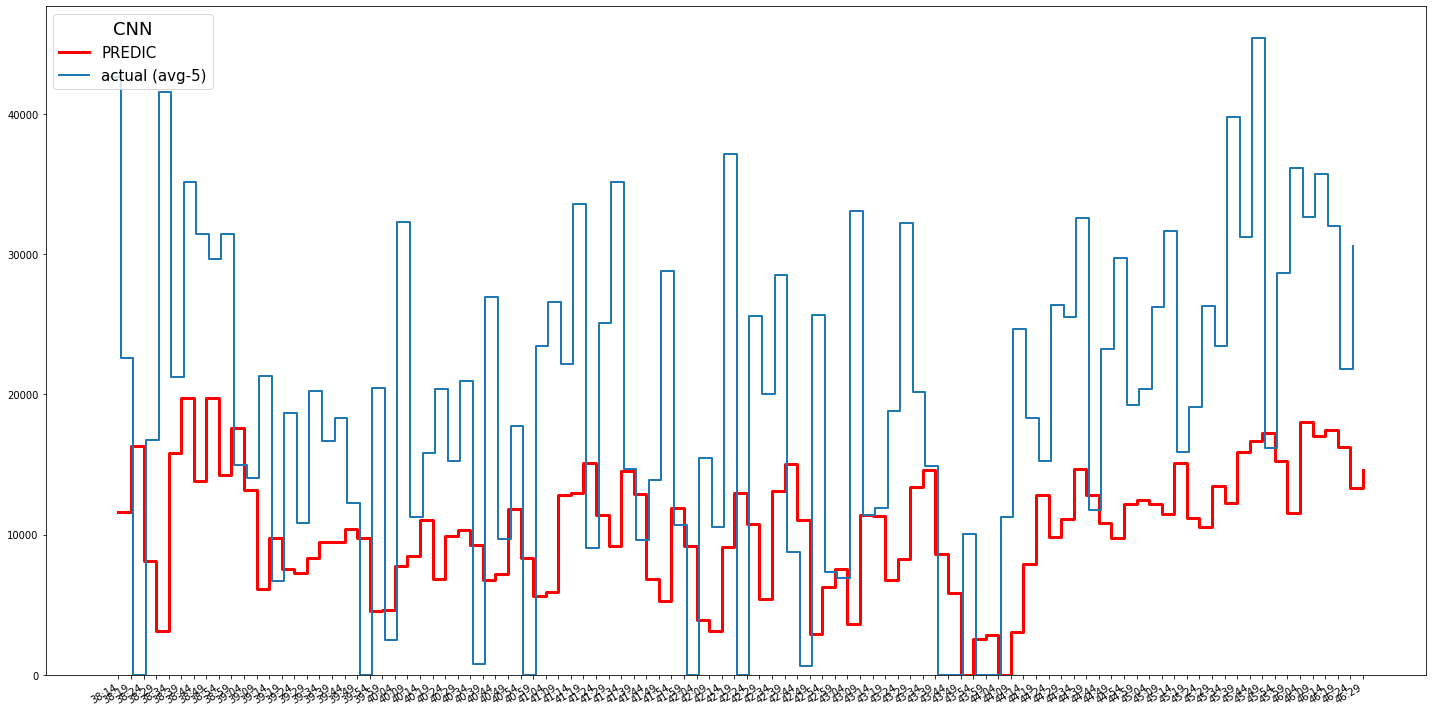

In [282]:
def generate_data_from_dataset(a,tp_per_x_sec):
    #print(data_test[0:100])
    #Pre-process data
    columns2 = ['ntp_time','throughput']
    row2 = {
        columns2[0]: [],
        columns2[1]: []   
    }
    start_time = float(a.iloc[0]["start"])
   
    end_time = start_time + tp_per_x_sec
    buffer_durasi = 0
    buffer_th = 0
    for index, row in a.iterrows():
        th = int(row['tp'])
        start = float(row['start'])
        durasi = float(row['durasi'])
        print(start)
        print(end_time)
        while start >= end_time:
            tp_updated = (buffer_durasi * buffer_th)
            row2['ntp_time'].append(float(end_time - tp_per_x_sec))
            row2['throughput'].append(round(tp_updated/tp_per_x_sec))
            buffer_durasi = 0
            end_time = end_time + tp_per_x_sec
            buffer_th = th
        
        if (start + durasi >= end_time): #rekaputulasi data
            
            if (durasi >= tp_per_x_sec):
                print(buffer_durasi)
                buffer_durasi_local = buffer_durasi + durasi
                durasi_round_down = np.floor(buffer_durasi_local)
                xx = np.floor(durasi_round_down / tp_per_x_sec)
                print(xx)
                print("a")
                print(buffer_durasi_local)
                for i in range(int(xx)):
                    if (i == 0):
                        tp_updated = (buffer_durasi * buffer_th) + ((1-buffer_durasi)*th)
                        print(tp_updated)
                        row2['ntp_time'].append(float(end_time - tp_per_x_sec))
                        row2['throughput'].append(round(tp_updated/tp_per_x_sec))
                        end_time = end_time + tp_per_x_sec
                    else :
                        
                        row2['ntp_time'].append(float(end_time - tp_per_x_sec))
                        row2['throughput'].append(round(th/tp_per_x_sec))
                        end_time = end_time + tp_per_x_sec
                buffer_durasi = buffer_durasi_local - xx * tp_per_x_sec
                print("buffer d")
                print(buffer_durasi)
                buffer_th = th    
                print(buffer_th)
                
            else:
                total_durasi = buffer_durasi + durasi
                excess = total_durasi - tp_per_x_sec
                print(buffer_durasi)
                print(durasi)
                print(excess)
                if (excess < 0):
                    th_updated = (buffer_durasi * buffer_th) + ((durasi) * th) 
                    
                    row2['ntp_time'].append(float(end_time - tp_per_x_sec))
                    row2['throughput'].append(round(th_updated/tp_per_x_sec))
                    end_time = end_time + tp_per_x_sec
                    buffer_durasi = 0
                    buffer_th = 0
                else:
                    th_updated = (buffer_durasi * buffer_th) + ((durasi - excess) * th)  
                    print("tes")
                    print(durasi)
                    print(excess)
                    print(th_updated)  
                    row2['ntp_time'].append(float(end_time - tp_per_x_sec))
                    row2['throughput'].append(round(th_updated/tp_per_x_sec))
                    end_time = end_time + tp_per_x_sec
                    buffer_durasi = excess
                    buffer_th = th     
    
        else : 
                 
            buffer_th = (buffer_durasi * buffer_th) + (durasi * th)       
            buffer_durasi = buffer_durasi +durasi
            buffer_th = buffer_th / buffer_durasi

            
    preprocessData = pd.DataFrame(row2, columns=columns2)
    
    return preprocessData

df_smooth = generate_data_from_dataset(df,5)
pd.set_option('display.max_rows',None)

truthSmooth = {
    "time" : [],
    "tp" : []
}

startTime = df["start"][0]
tpList=[]
buffer = 0
endTime = startTime + 5
indexx = 0
for index, row in df.iterrows():
    if row["time"] <= endTime:
        tpList.append({'tp':row["tp"],'waktu': row["time"] - row["start"]})
        buffer = buffer + (row["time"] - row["start"])
        
    elif row["time"] > endTime:
        sum = 0
        if buffer == 0:
            truthSmooth["time"].append(endTime-5)
            truthSmooth["tp"].append(0)
            endTime = endTime + 5
            continue
        for x in tpList:
            sum = sum + (x["waktu"]/buffer*(x["tp"]))
              
        indexx = indexx + 1
        tpList = []
        
        truthSmooth["time"].append(endTime-5)
        truthSmooth["tp"].append(sum)
        endTime = endTime + 5
        tpList.append({'tp':row["tp"],'waktu': row["time"] - row["start"]})
        buffer = row["time"] - row["start"]
dfSmooth = pd.DataFrame(truthSmooth, columns=["time","tp"])
print(df_smooth)
plt.figure(figsize=(20,10))
# plt.bar(df["time"][startingPoin:endPoin],df["tp"][startingPoin:endPoin],0.2, color="green",label='actual')
#plt.bar(dfSmooth["time"][startPredicPoin:endPredicPoin],df["tp"][startPredicPoin:endPredicPoin],0.2, color="red",label='groundtruth (smooth')
# plt.plot(dfSmooth["time"][startPredicPoin:endPredicPoin],dfSmooth["tp"][startPredicPoin:endPredicPoin],label='actual (avg)',drawstyle="steps-post", linewidth=3)
plt.plot(normalize_data["time"][startPredicPoin:endPredicPoin],normalize_data["prediction"][startPredicPoin:endPredicPoin],label='PREDIC',drawstyle="steps-post", linewidth=3, color="red")
plt.plot(df_smooth["ntp_time"][startPredicPoin:endPredicPoin],df_smooth["throughput"][startPredicPoin:endPredicPoin],label='actual (avg-5)',drawstyle="steps-post", linewidth=2)
plt.gcf().autofmt_xdate()

plt.gca().xaxis.set_major_locator(mtick.FixedLocator(normalize_data["time"][startPredicPoin:endPredicPoin]))
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda pos,_: time.strftime("%M:%S",time.localtime(pos)))
    )
plt.tight_layout()
plt.ylim(ymin=0)
plt.legend(loc=2, prop={'size': 15},title = "CNN",title_fontsize=18)
plt.show()

In [284]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
import csv
actual = open('../cnn/esp3.csv')
type(actual)
csvreader = csv.reader(actual)
rows = []
for row in csvreader:
        rows.append(row)
y_actual=[]
for x in range(len(rows)):
    y_actual.append(rows[x][1])

predict=open('output-cnn-Rosa.csv')
type(predict)
iya = csv.reader(predict)
rows = []
for row in iya:
        rows.append(row)

y_predic=[]
for y in range(len(rows)):
    y_predic.append(rows[y][1])
y1=([float(x) for x in y_actual])
y2=([float(x) for x in y_predic])
# print("ini y1")
# print(y1)
# print("ini y2")
# print(y2)

rms = mean_squared_error(y1, y2, squared=False)
print("rmse = "+str(rms))
mape=mean_absolute_percentage_error(y1, y2)
print("mape = "+str(mape))
mae=mean_absolute_error(y1, y2)
print("mae = "+str(mae))
r2=r2_score(y1,y2)

print("r2 = "+str(r2))
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(LinearRegression(), y1, y2, cv=669, scoring='r2')
# print(scores)


rmse = 36403.50243639856
mape = 2.5243966346798277e+19
mae = 21853.082819010415
r2 = -0.0524181619152273
